# 딥러닝 구조 연습2

## 라이브러리 로드

In [31]:
import pandas as pd
import tensorflow as tf

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 데이터 로드

In [32]:
diabetes_df =pd.read_csv('./data/diabetes.csv')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 데이터 준비

In [33]:
X_train = diabetes_df.drop(['Outcome'],axis=1)
y_train = diabetes_df['Outcome']

In [34]:
type(X_train),type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [35]:
X_train.shape

(768, 8)

In [36]:
y_train.shape

(768,)

## 딥러닝 구성하기

http://alexlenail.me/NN-SVG/index.html

In [37]:
# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12,input_shape=(8,), activation='relu')) #유닛이 12개
model.add(Dense(1, activation='sigmoid')) #모델을 만드는 목적 : 인진 분류
# 위의 사이트에서 8 , 12, 1 을 입력하면 이해하기 쉬움




In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                108       
                                                                 
 dense_4 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


## 딥러닝 설정하기

In [40]:
# 모델을 컴파일합니다.
# 이진분류 loss: binary_crossentropy
# 2-1은 회귀라서 mean을 씀
model.compile(loss='binary_crossentropy',
optimizer=tf.keras.optimizers.Adam(0.9),metrics=['Accuracy']) #학습률을 지정안할거면 그냥 'adam' 하면됌


## 딥러닝 훈련하기

In [41]:
# 모델을 실행합니다.
epoch_hist = model.fit(X_train,y_train,epochs=200)

Epoch 1/200
24/24 [==============================] - 0s 1ms/step - loss: 35.8846 - Accuracy: 0.5755
Epoch 2/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6522 - Accuracy: 0.6510
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6595 - Accuracy: 0.6510
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6609 - Accuracy: 0.6510
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: 0.6604 - Accuracy: 0.6510
Epoch 6/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6573 - Accuracy: 0.6510
Epoch 7/200
24/24 [==============================] - 0s 1ms/step - loss: 0.6576 - Accuracy: 0.6510
Epoch 8/200
24/24 [==============================] - 0s 1ms/step - loss: 0.6566 - Accuracy: 0.6510
Epoch 9/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6586 - Accuracy: 0.6510
Epoch 10/200
24/24 [==============================] - 0s 1ms/step - loss: 0.6700 - Accuracy: 0.6146
Epoch 11

## 평가하기

In [42]:
# 결과를 출력합니다.
model.evaluate(X_train,y_train)

24/24 [==============================] - 0s 1ms/step - loss: 0.6469 - Accuracy: 0.6510


[0.6468873620033264, 0.6510416865348816]

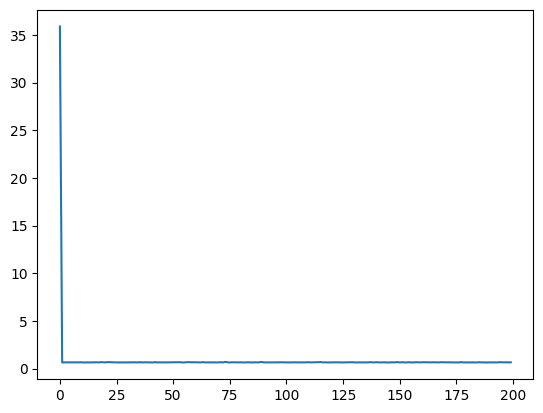

In [44]:
import matplotlib.pyplot as plt

plt.plot(epoch_hist.history['loss'])

## 전체 코드

In [1]:
import pandas as pd
import tensorflow as tf

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#데이터 로드
diabetes_df =pd.read_csv('./data/diabetes.csv')

#데이터 준비
X_train = diabetes_df.drop(['Outcome'],axis=1)
y_train = diabetes_df['Outcome']

#딥러닝 구성
model = Sequential()
model.add(Dense(10,input_shape=(8,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#딥러닝 설정
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Accuracy'])

#딥러닝 훈련
epoch_hist = model.fit(X_train,y_train,epochs=300)

#평가하기
model.evaluate(X_train,y_train)

Epoch 1/300
24/24 [==============================] - 1s 2ms/step - loss: 6.2708 - Accuracy: 0.4245
Epoch 2/300
24/24 [==============================] - 0s 1ms/step - loss: 3.1101 - Accuracy: 0.4870
Epoch 3/300
24/24 [==============================] - 0s 2ms/step - loss: 2.1815 - Accuracy: 0.5312
Epoch 4/300
24/24 [==============================] - 0s 1ms/step - loss: 1.6592 - Accuracy: 0.5247
Epoch 5/300
24/24 [==============================] - 0s 2ms/step - loss: 1.3478 - Accuracy: 0.5195
Epoch 6/300
24/24 [==============================] - 0s 2ms/step - loss: 1.1412 - Accuracy: 0.5755
Epoch 7/300
24/24 [==============================] - 0s 1ms/step - loss: 1.0063 - Accuracy: 0.5924
Epoch 8/300
24/24 [==============================] - 0s 2ms/step - loss: 0.9228 - Accuracy: 0.6081
Epoch 9/300
24/24 [==============================] - 0s 1ms/step - loss: 0.8391 - Accuracy: 0.6276
Epoch 10/300
24/24 [==============================] - 0s 2ms/step - loss: 0.7862 - Accuracy: 0.6380
Epoch 11/

[0.4554380476474762, 0.7916666865348816]

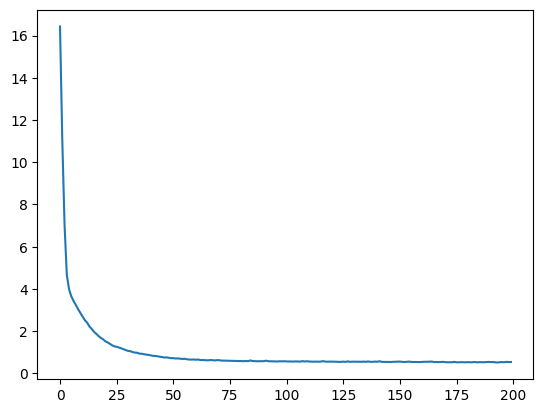

In [58]:
import matplotlib.pyplot as plt

plt.plot(epoch_hist.history['loss'])

## 실험

아래의 파라미터를 조정해보며 네트워크의 구성과 성능을 살펴봅시다. 
* Dense층의 유닛개수를 조정해 봅시다. 
* Dense층을 더 넣어 봅시다. 
* epoch수와 batch_size를 조정해 봅시다.

In [ ]:
import pandas as pd
import tensorflow as tf

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#데이터 로드
diabetes_df =pd.read_csv('./data/diabetes.csv')

#데이터 준비
X_train = diabetes_df.drop(['Outcome'],axis=1)
y_train = diabetes_df['Outcome']

#딥러닝 구성
model = Sequential()
model.add(Dense(10,input_shape=(8,), activation='relu'))
model.add(Dense(10,input_shape=(8,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#딥러닝 설정
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Accuracy'])

#딥러닝 훈련
epoch_hist = model.fit(X_train,y_train,epochs=300)

#평가하기
model.evaluate(X_train,y_train)